The United States Social Security Administration (SSA) has made available data on
the frequency of baby names from 1880 through the present. Hadley Wickham, an
author of several popular R packages, has often made use of this dataset in illustrating
data manipulation in R.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyzing-Naming-Trends" data-toc-modified-id="Analyzing-Naming-Trends-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyzing Naming Trends</a></span></li><li><span><a href="#Measuring-the-increase-in-naming-diversity" data-toc-modified-id="Measuring-the-increase-in-naming-diversity-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Measuring the increase in naming diversity</a></span></li><li><span><a href="#The-&quot;last-letter&quot;-revolution" data-toc-modified-id="The-&quot;last-letter&quot;-revolution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The "last letter" revolution</a></span></li><li><span><a href="#Boy-names-that-became-girl-names-(and-vice-versa)" data-toc-modified-id="Boy-names-that-became-girl-names-(and-vice-versa)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Boy names that became girl names (and vice versa)</a></span></li></ul></div>

In [0]:
!wget -qnc -P ./babynames https://www.ssa.gov/oact/babynames/names.zip
!unzip -oqq -d ./babynames ./babynames/names.zip
!rm -rf ./babynames/names.zip ./babynames/NationalReadMe.pdf

In [2]:
!head -n 10 ./babynames/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [0]:
names1880 = pd.read_csv("./babynames/yob1880.txt", 
                        names=["name", "sex", "births"])

In [5]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [6]:
names1880.groupby("sex").sum()

,births
sex,
F,90994
M,110490


In [0]:
years = range(1880, 2019)

In [0]:
pieces = []
columns = ["name", "sex", "births"]

In [0]:
for year in years:
    path = rf"./babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [0]:
names = pd.concat(pieces, ignore_index=True)

In [11]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


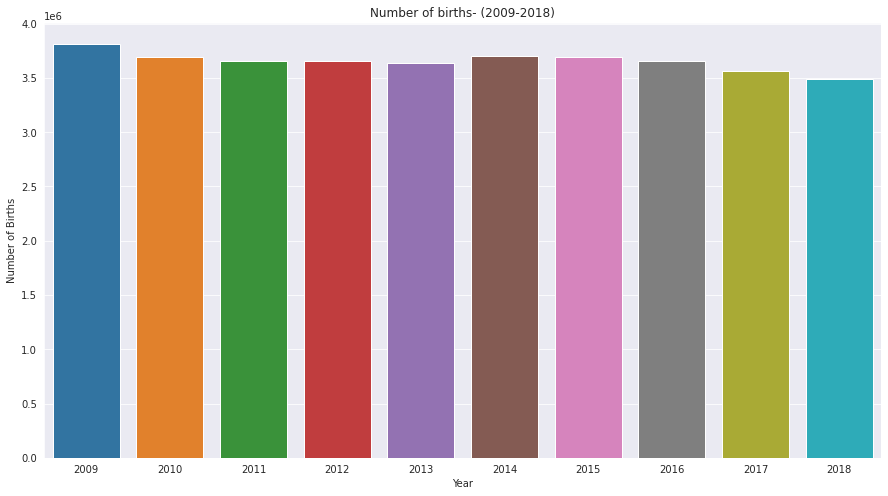

In [12]:
plt.figure(figsize=(15, 8))
_ = sns.barplot(y=names.groupby("year").sum().values[-10:].ravel(), x=list(years)[-10:])
plt.ylabel("Number of Births")
plt.xlabel("Year")
_ = plt.title("Number of births- (2009-2018)")

In [13]:
names.shape

(1957046, 4)

In [0]:
total_births = names.pivot_table(values="births", index="year", 
                                 columns="sex", aggfunc=sum)

In [15]:
total_births.tail()

sex,F,M
year,,
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837
2018,1686961,1800392


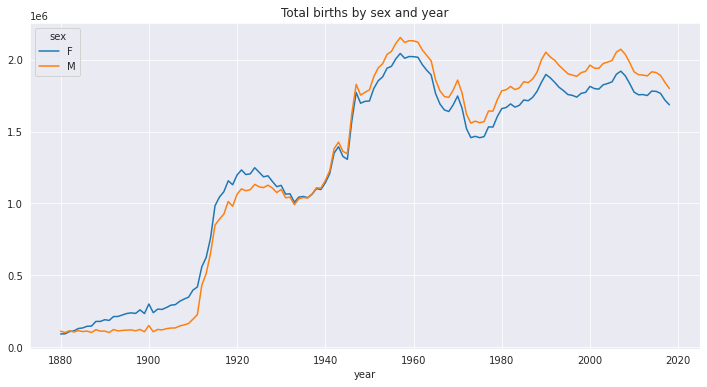

In [16]:
_ = total_births.plot(title='Total births by sex and year', figsize=(12, 6))

Inserting a column prop with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name. Thus, we group the data by year and sex, then add the new column to each group

Result can be interpreted as:
In the year 1880, every 77 female out of 100 were name "Mary"

In [0]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [0]:
# for i, j in names.groupby(['year', 'sex']):
#     print(i)
#     print(j)
#     print(j.births)
#     print(j.births.sum())
#     break

In [19]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


In [20]:
# sanity check

names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [0]:
# get top 1000 names sex/year

def get_top_1000(group):
    return group.sort_values(by="births", ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top_1000)
top1000.reset_index(inplace=True, drop=True)

In [0]:
# for i, j in top1000.groupby(['year', 'sex']):
#     print(i)
#     print(j.shape)
#     print()

In [23]:
top1000.take([1000, 2000, 30000, 13444])

,name,sex,births,year,prop
1000,Charley,M,305,1880,0.002760
2000,Nancy,F,429,1881,0.004665
30000,Estelle,F,381,1895,0.001631
13444,Billie,M,12,1886,0.000108


In [24]:
# we can see that both genders could contain the same name
top1000.loc[top1000["name"] == "Mary"].groupby("sex").births.sum()

sex
F    4125675
M      13816
Name: births, dtype: int64

In [0]:
# # another approach

# pieces = []
# for year, group in names.groupby(['year', 'sex']):
#  pieces.append(group.sort_values(by='births', ascending=False)[:1000])

# top1000 = pd.concat(pieces, ignore_index=True)

# Analyzing Naming Trends

In [0]:
# splitting into male and female

boys = top1000[top1000.sex == "M"]
girls = top1000[top1000.sex == "F"]

In [27]:
total_births = top1000.pivot_table(values="births", index="year",
                                   columns="name", aggfunc=sum)
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,Abbott,Abby,Abdiel,Abdul,Abdullah,Abe,Abel,Abelardo,Abigail,Abigale,Abigayle,Abner,Abraham,Abram,Abrielle,Abril,Ace,Achilles,Acie,Ada,Adah,Adalberto,Adalee,Adaline,Adalyn,Adalynn,Adam,...,Zechariah,Zed,Zeke,Zela,Zelda,Zelia,Zella,Zelma,Zelpha,Zena,Zenas,Zendaya,Zenia,Zennie,Zeno,Zenobia,Zeta,Zetta,Zettie,Zev,Zhane,Zhavia,Zigmund,Zillah,Zilpah,Zilpha,Zina,Zion,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,6.0,NaN,NaN,NaN,50.0,9.0,NaN,12.0,NaN,NaN,27.0,81.0,21.0,NaN,NaN,NaN,NaN,NaN,652.0,24.0,NaN,NaN,23.0,NaN,NaN,104.0,...,NaN,NaN,6.0,NaN,6.0,NaN,31.0,19.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,7.0,NaN,NaN,NaN,36.0,12.0,NaN,8.0,NaN,NaN,30.0,86.0,30.0,NaN,NaN,NaN,NaN,6.0,628.0,29.0,NaN,NaN,18.0,NaN,NaN,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,38.0,17.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,11.0,NaN,NaN,NaN,50.0,10.0,NaN,14.0,NaN,NaN,32.0,91.0,25.0,NaN,NaN,8.0,NaN,NaN,689.0,27.0,NaN,NaN,16.0,NaN,NaN,114.0,...,NaN,NaN,NaN,NaN,6.0,NaN,50.0,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12.0,NaN,11.0,NaN,NaN,27.0,52.0,20.0,NaN,NaN,6.0,NaN,NaN,778.0,41.0,NaN,NaN,11.0,NaN,NaN,107.0,...,NaN,NaN,6.0,NaN,NaN,5.0,55.0,16.0,NaN,13.0,NaN,NaN,NaN,NaN,6.0,5.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,6.0,NaN,NaN,NaN,45.0,14.0,NaN,13.0,NaN,NaN,33.0,67.0,29.0,NaN,NaN,NaN,NaN,NaN,854.0,33.0,NaN,NaN,20.0,NaN,NaN,83.0,...,NaN,NaN,NaN,NaN,7.0,NaN,63.0,29.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,NaN,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,239.0,NaN,4883.0,266.0,531.0,7392.0,NaN,NaN,NaN,NaN,NaN,NaN,322.0,NaN,842.0,257.0,NaN,413.0,NaN,2562.0,NaN,12085.0,NaN,NaN,NaN,2378.0,832.0,276.0,272.0,821.0,NaN,NaN,863.0,NaN,NaN,NaN,NaN,2117.0,2521.0,5328.0,...,384.0,NaN,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1778.0,NaN,NaN,5877.0,7411.0,366.0,NaN,NaN,NaN,NaN,NaN,666.0,NaN
2015,297.0,NaN,4863.0,NaN,540.0,7159.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.0,254.0,NaN,395.0,NaN,3238.0,NaN,12401.0,NaN,NaN,NaN,2447.0,836.0,NaN,274.0,740.0,214.0,NaN,919.0,NaN,NaN,NaN,902.0,2453.0,2618.0,5391.0,...,393.0,NaN,356.0,NaN,443.0,NaN,NaN,NaN,NaN,NaN,NaN,354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993.0,NaN,NaN,6041.0,6944.0,371.0,NaN,NaN,NaN,NaN,NaN,714.0,NaN
2016,NaN,284.0,4641.0,NaN,519.0,7157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.0,329.0,NaN,406.0,NaN,3031.0,NaN,11760.0,NaN,NaN,NaN,2579.0,861.0,NaN,316.0,1037.0,227.0,NaN,964.0,NaN,NaN,NaN,1878.0,2187.0,2590.0,5200.0,...,323.0,NaN,397.0,NaN,424.0,NaN,NaN,NaN,NaN,NaN,NaN,303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2134.0,NaN,NaN,5743.0,6444.0,312.0,NaN,NaN,NaN,NaN,NaN,889.0,248.0


In [28]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


In [0]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

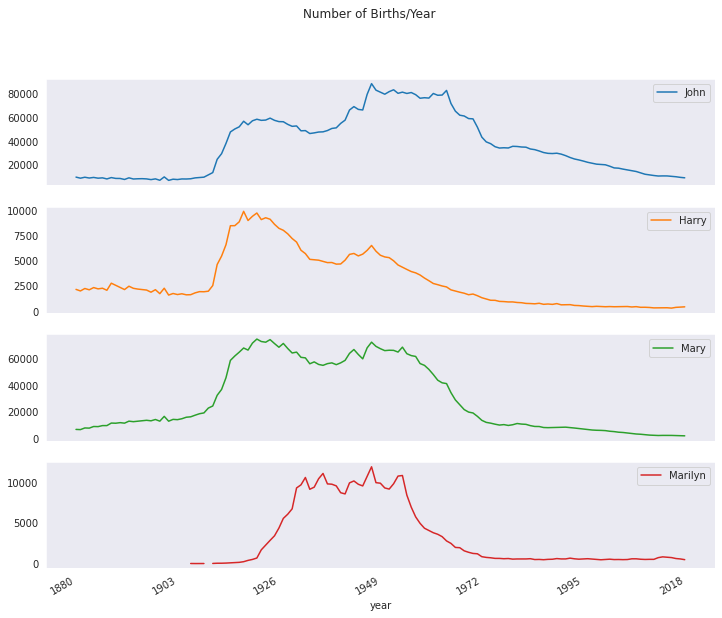

In [30]:
_ = subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of Births/Year")
_ = plt.xticks(range(1880, 2019, 23))

# Measuring the increase in naming diversity


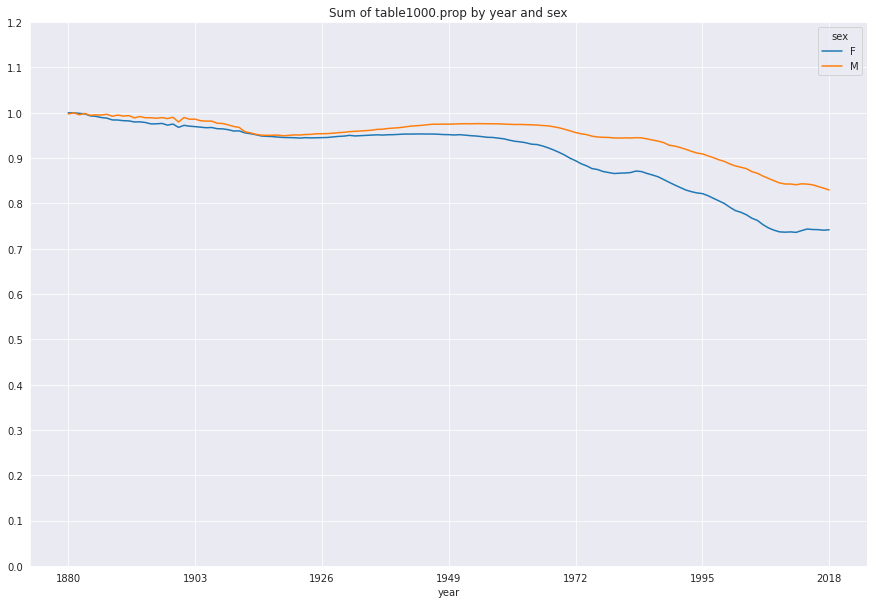

In [31]:
# decrease in usage of popular names

table = top1000.pivot_table(values='prop', index='year',
                            columns='sex', aggfunc=sum)
_ = table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2019, 23),
           figsize=(15, 10)
)

Another interesting metric is the number of dis‐
tinct names, taken in order of popularity from highest to lowest, in the top 50% of births. 


In [32]:
df = boys[boys.year == 2010]
df.prop.sum()

0.8428234947893947

After sorting prop in descending order, we want to know how many of the most popular names it takes to reach 50%

In [33]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011546
260878    0.020939
260879    0.029992
260880    0.038956
260881    0.047853
260882    0.056596
260883    0.065180
260884    0.073447
260885    0.081554
260886    0.089638
Name: prop, dtype: float64

In [34]:
prop_cumsum.values.searchsorted(0.5)
# 117

116

It takes a name to used 117 times to get into top 50% names of 2010

In [0]:
df = boys[boys.year == 1900]

In [36]:
in1900 = df.sort_values(by="prop", ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

It 1900 it took just 25 times for a name to get into top 50%.

In [0]:
# getting count for each year/sex

def get_quantile_count(group, q=0.5):
    group = group.sort_values(by="prop", ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [38]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
print(diversity)

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2016  M      139
2017  F      254
      M      143
2018  F      259
      M      149
Length: 278, dtype: int64


In [0]:
diversity = diversity.unstack("sex")

In [40]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


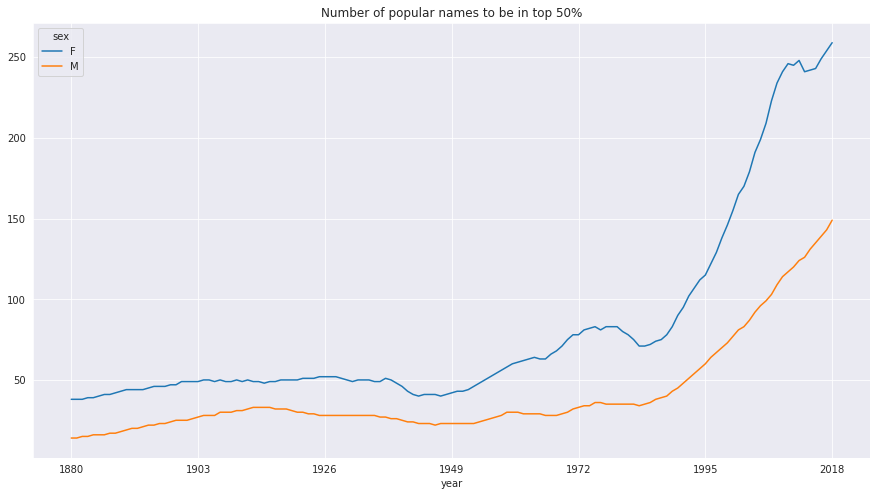

In [41]:
diversity.plot(title="Number of popular names to be in top 50%", figsize=(15, 8))
_ = plt.xticks(range(1880, 2019, 23))

# The "last letter" revolution

In 2007, baby name researcher Laura Wattenberg pointed out on her website that the distribution of boy names by final letter has changed significantly over the last 100 years

In [0]:
# extract last letter

get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [43]:
table = names.pivot_table(values="births", index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)
table

sex                F                    ...         M                    
year            1880     1881     1882  ...      2016      2017      2018
last_letter                             ...                              
a            31446.0  31581.0  36536.0  ...   29703.0   30226.0   30691.0
b                NaN      NaN      NaN  ...   26973.0   24501.0   22563.0
c                NaN      NaN      5.0  ...   22040.0   20534.0   19338.0
d              609.0    607.0    734.0  ...   42979.0   42056.0   41585.0
e            33381.0  34080.0  40399.0  ...  125930.0  121785.0  119409.0
f                NaN      NaN      NaN  ...    2836.0    2834.0    2740.0
g                7.0      5.0     12.0  ...    5293.0    5299.0    5054.0
h             4863.0   4783.0   5566.0  ...  102197.0   99304.0   96531.0
i               61.0     78.0     81.0  ...   49092.0   49951.0   50934.0
j                NaN      NaN      NaN  ...    1428.0    1476.0    1431.0
k               13.0     15.0     11.0  ...   36010.0   36755.0   36086.0
l             2541.0   2910.0   3527.0  ...  126083.0  121145.0  116983.0
m               58.0     57.0     81.0  ...   59448.0   59043.0   58956.0
n             3008.0   2959.0   3575.0  ...  647185.0  622676.0  600817.0
o               30.0     49.0     35.0  ...   91123.0   92953.0   96794.0
p                NaN      NaN      NaN  ...    2349.0    2494.0    2389.0
q                NaN      NaN      NaN  ...     406.0     406.0     433.0
r              481.0    417.0    590.0  ...  177666.0  172561.0  168630.0
s             1391.0   1316.0   1637.0  ...  133167.0  132660.0  131671.0
t             2152.0   2165.0   2399.0  ...   56990.0   58322.0   57910.0
u              380.0    427.0    410.0  ...    4060.0    4376.0    4653.0
v                NaN      NaN      NaN  ...    3127.0    3169.0    3074.0
w                NaN      5.0      NaN  ...   24333.0   22154.0   19602.0
x                NaN      NaN      NaN  ...   20647.0   20762.0   20893.0
y            10467.0  10404.0  12143.0  ...   97222.0   91998.0   87856.0
z              106.0     95.0    106.0  ...    3298.0    3397.0    3369.0

[26 rows x 278 columns]

In [0]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-reindex/

subtable = table.reindex(columns=[1910, 1960, 2000, 2018], level="year")

In [45]:
subtable.head()

sex                 F                      ...         M                    
year             1910      1960      2000  ...      1960      2000      2018
last_letter                                ...                              
a            108399.0  691261.0  676038.0  ...    5212.0   40862.0   30691.0
b                 NaN     694.0     372.0  ...    3912.0   50925.0   22563.0
c                 5.0      49.0     525.0  ...   15454.0   27022.0   19338.0
d              6751.0    3731.0    4383.0  ...  262116.0   64334.0   41585.0
e            133601.0  435030.0  318445.0  ...  178768.0  148928.0  119409.0

[5 rows x 8 columns]

In [46]:
# normalizing

subtable.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2000    1815295.0
     2018    1686961.0
M    1910     194212.0
     1960    2132155.0
     2000    1963202.0
     2018    1800392.0
dtype: float64

normalize the table by total births to compute a new table containing propor‐
tion of total births for each sex ending in each letter

In [47]:
letter_prop = subtable / subtable.sum()
letter_prop.fillna(0, inplace=True)
letter_prop.head()

sex                 F                      ...         M                    
year             1910      1960      2000  ...      1960      2000      2018
last_letter                                ...                              
a            0.273386  0.341868  0.372412  ...  0.002444  0.020814  0.017047
b            0.000000  0.000343  0.000205  ...  0.001835  0.025940  0.012532
c            0.000013  0.000024  0.000289  ...  0.007248  0.013764  0.010741
d            0.017026  0.001845  0.002414  ...  0.122935  0.032770  0.023098
e            0.336947  0.215147  0.175423  ...  0.083844  0.075860  0.066324

[5 rows x 8 columns]

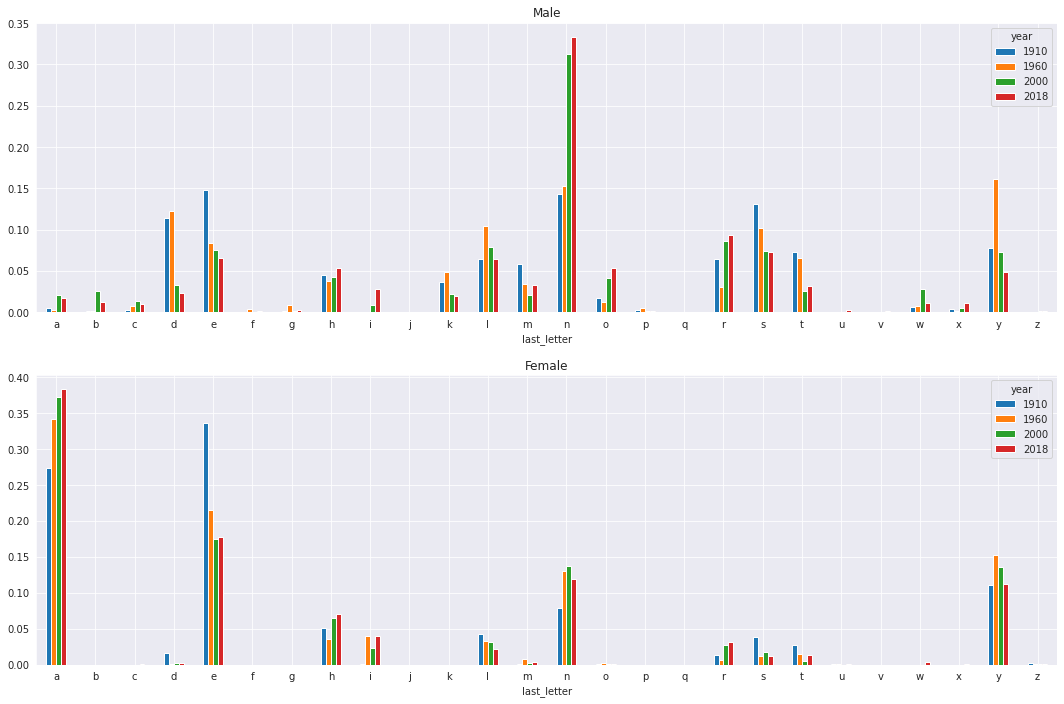

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')
plt.tight_layout(pad=1.5)

In [0]:
letter_prop = table / table.sum()

In [0]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [51]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


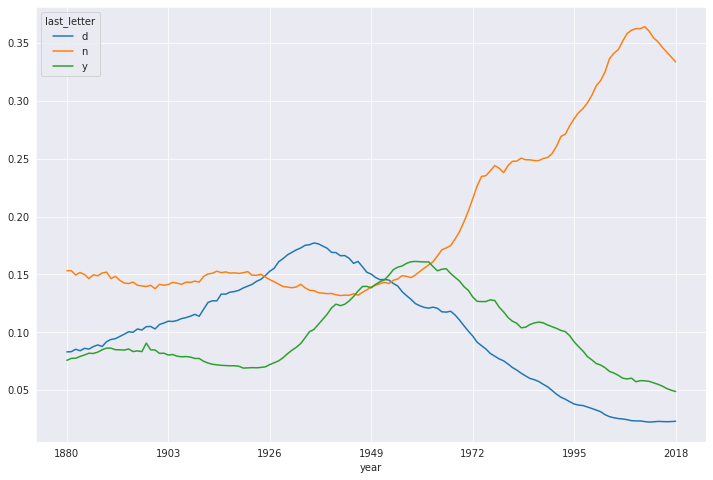

In [52]:
dny_ts.plot(figsize=(12, 8))
_ = plt.xticks(range(1880, 2019, 23))

# Boy names that became girl names (and vice versa)

In [0]:
all_names = pd.Series(top1000.name.unique())

In [54]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [55]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
268843,Lesly,F,276,2014,0.000155
270247,Leslie,F,878,2015,0.000493
272290,Leslie,F,803,2016,0.000455
274325,Leslie,F,702,2017,0.000408


In [56]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    378168
Lesly      11433
Name: births, dtype: int64

In [57]:
table = filtered.pivot_table(values='births', index='year',
                             columns='sex', aggfunc='sum')
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2014,1276.0,NaN
2015,878.0,NaN
2016,803.0,NaN


In [58]:
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2014,1.0,NaN
2015,1.0,NaN
2016,1.0,NaN
2017,1.0,NaN
2018,1.0,NaN


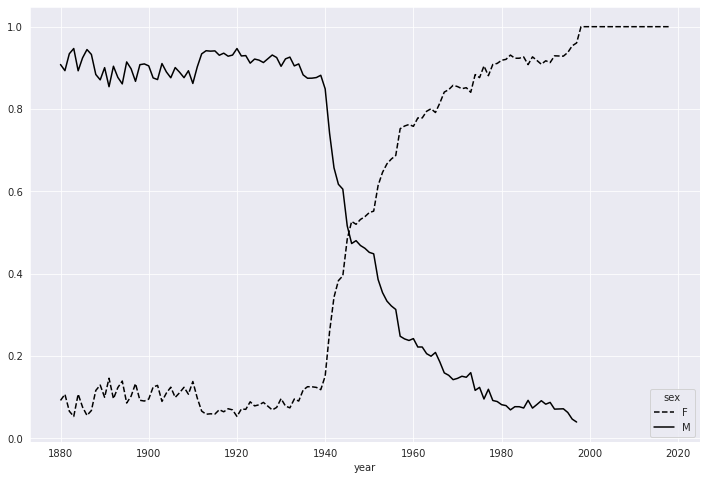

In [59]:
_ = table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(12, 8))